The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

Top Gender: Male
Top Country: United States of America
Decade with highest US-born Nobel Prize winner ratio: 2000
Decade and Category with highest proportion of female laureates: {2020: 'Literature'}
First woman to win a Nobel Prize: Marie Curie, née Sklodowska in Physics
Individuals/Organizations who won more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


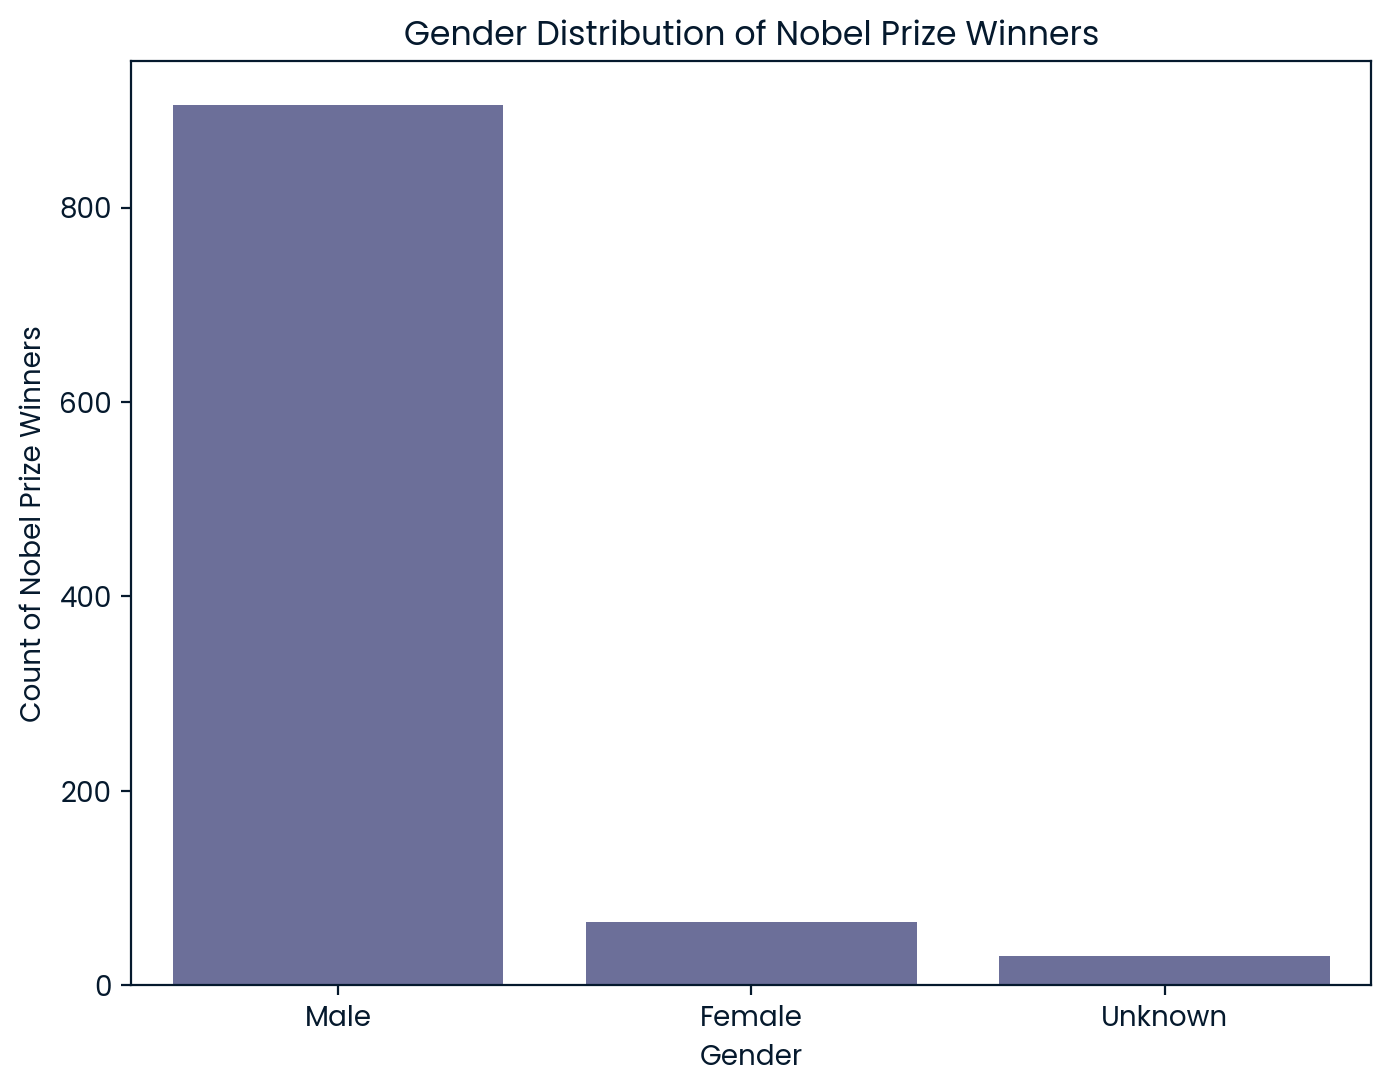

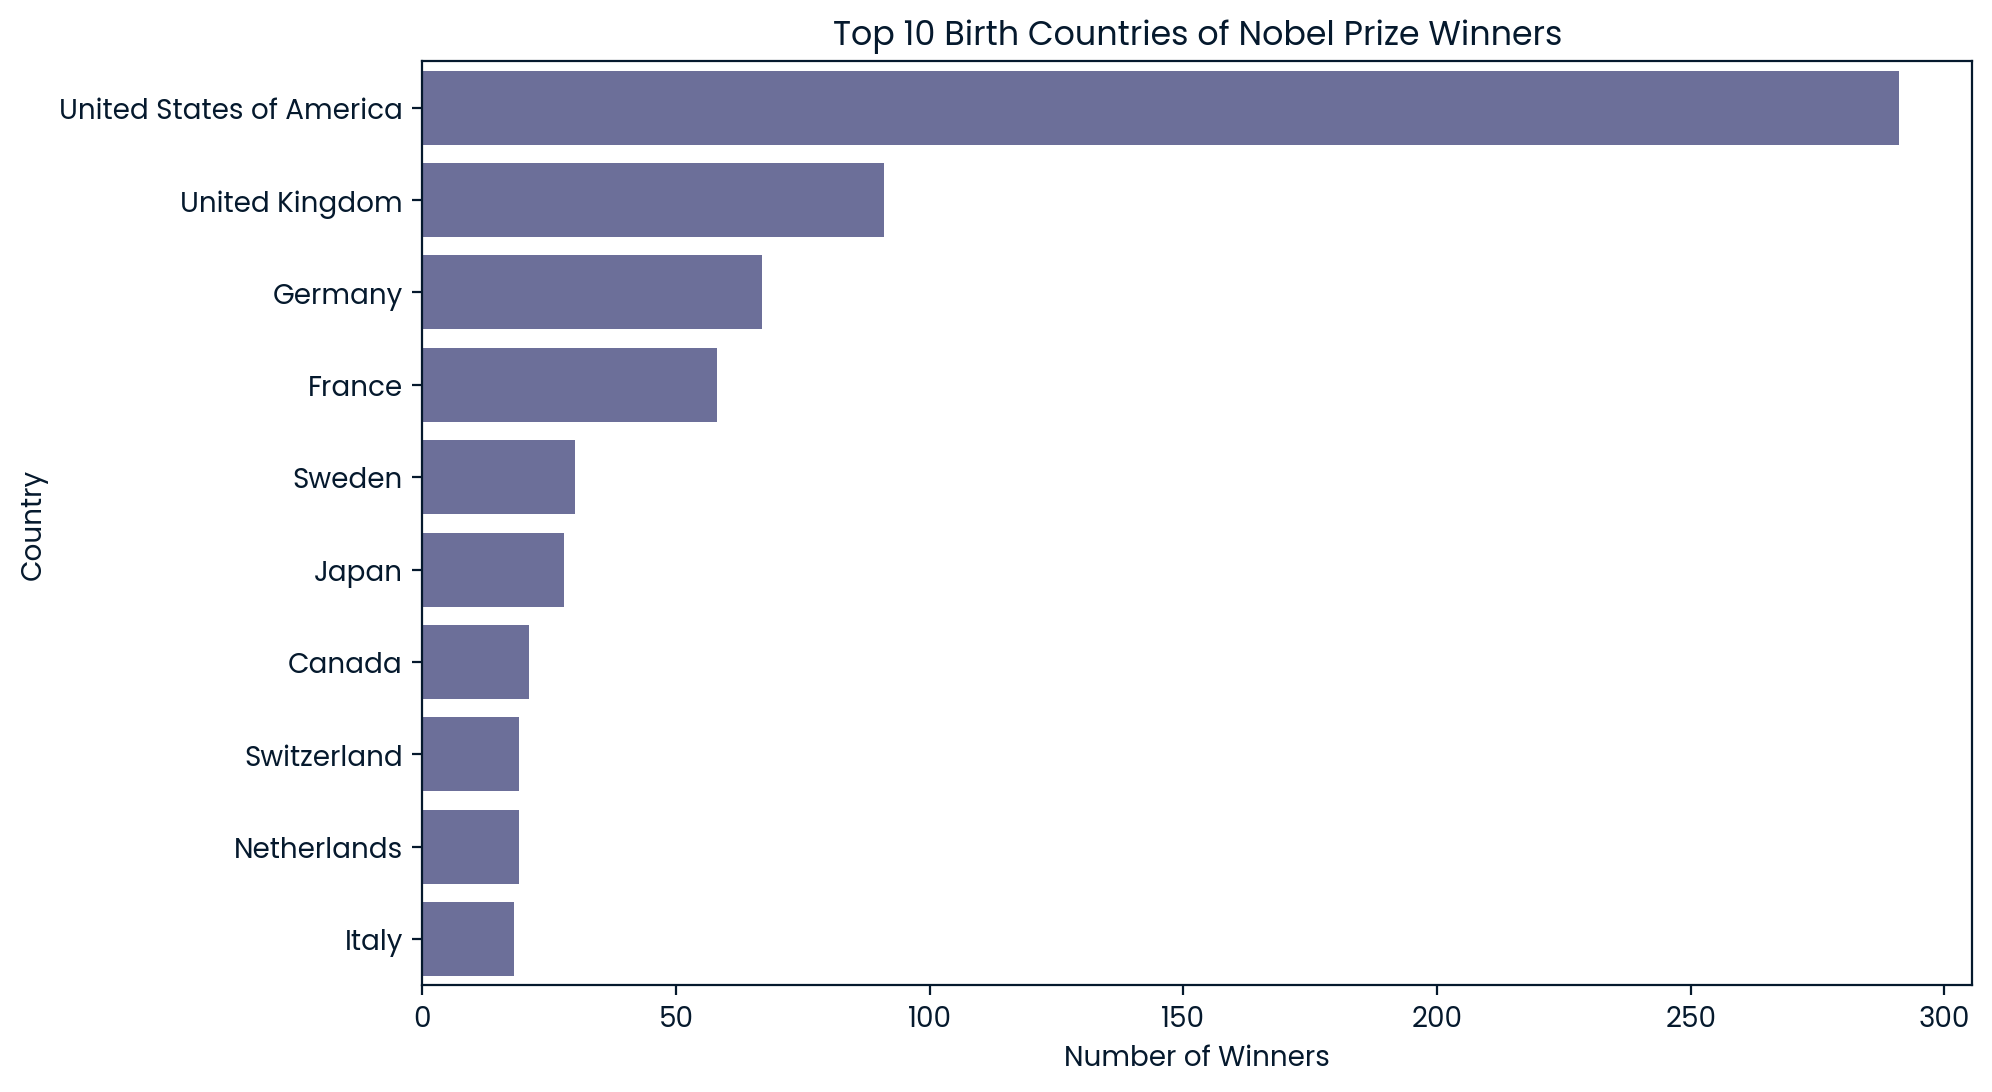

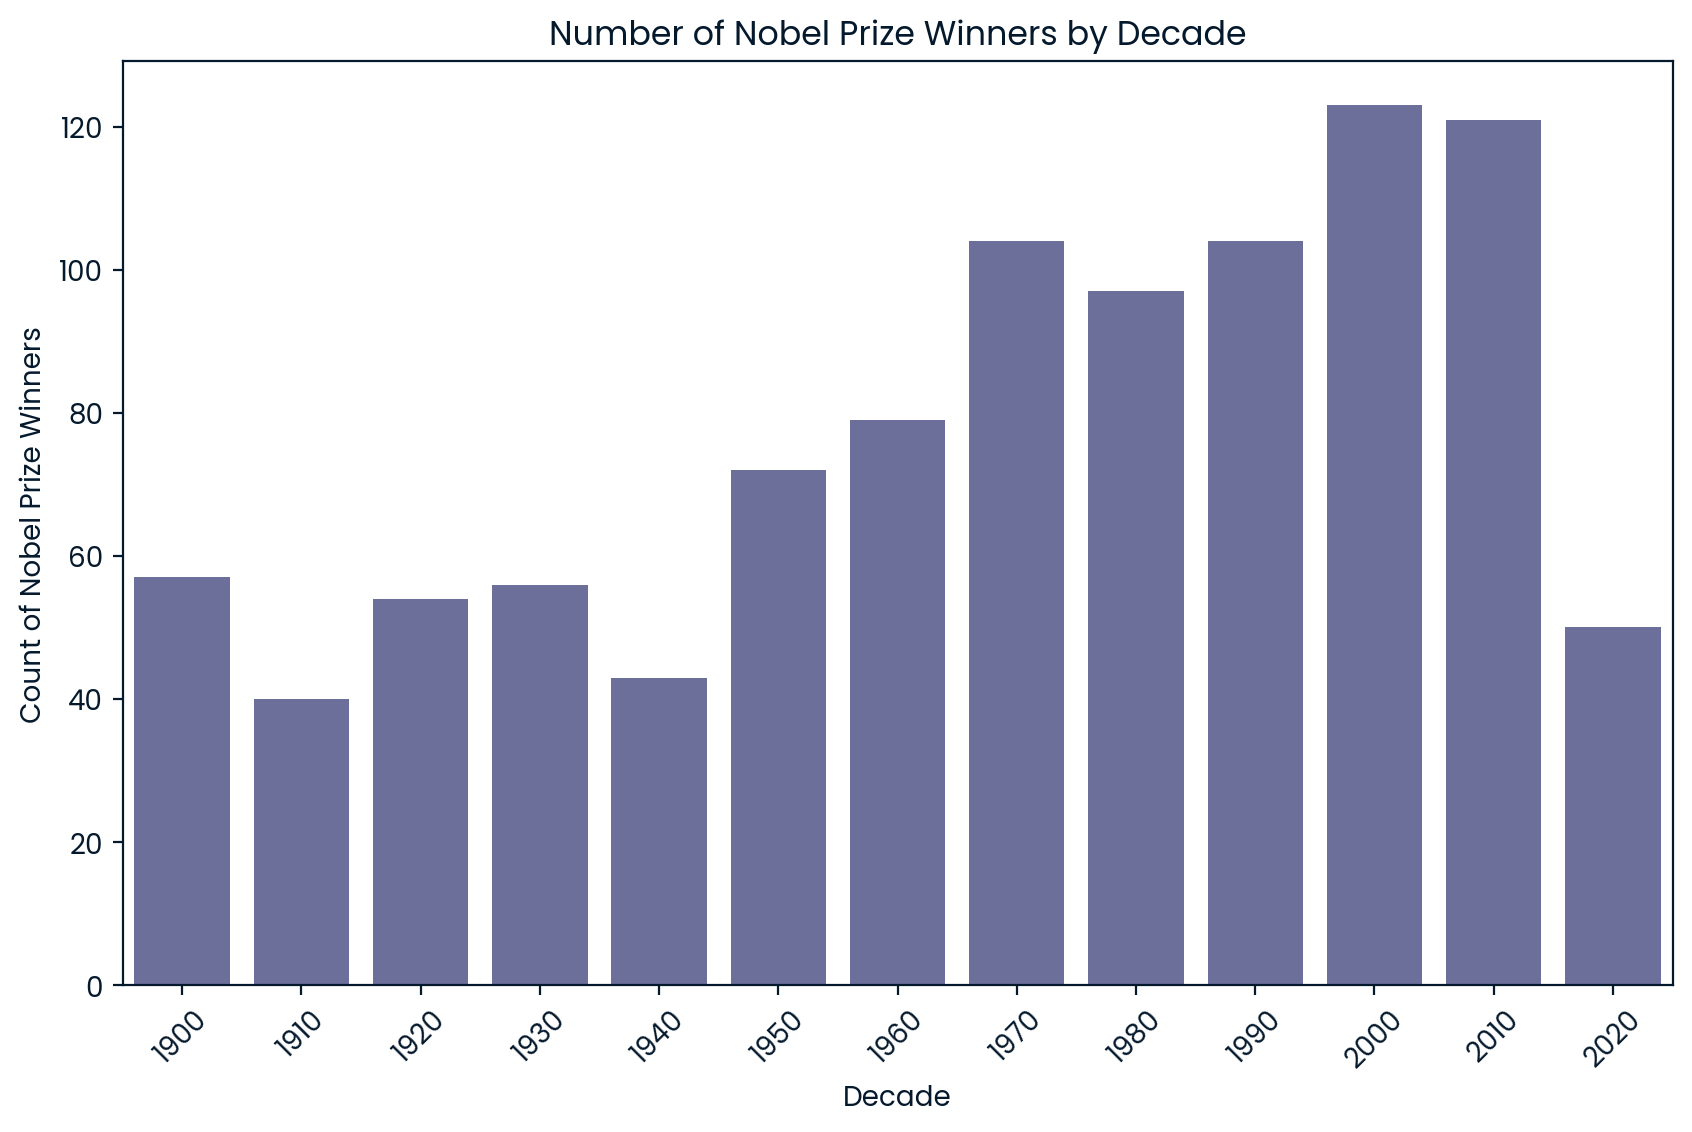

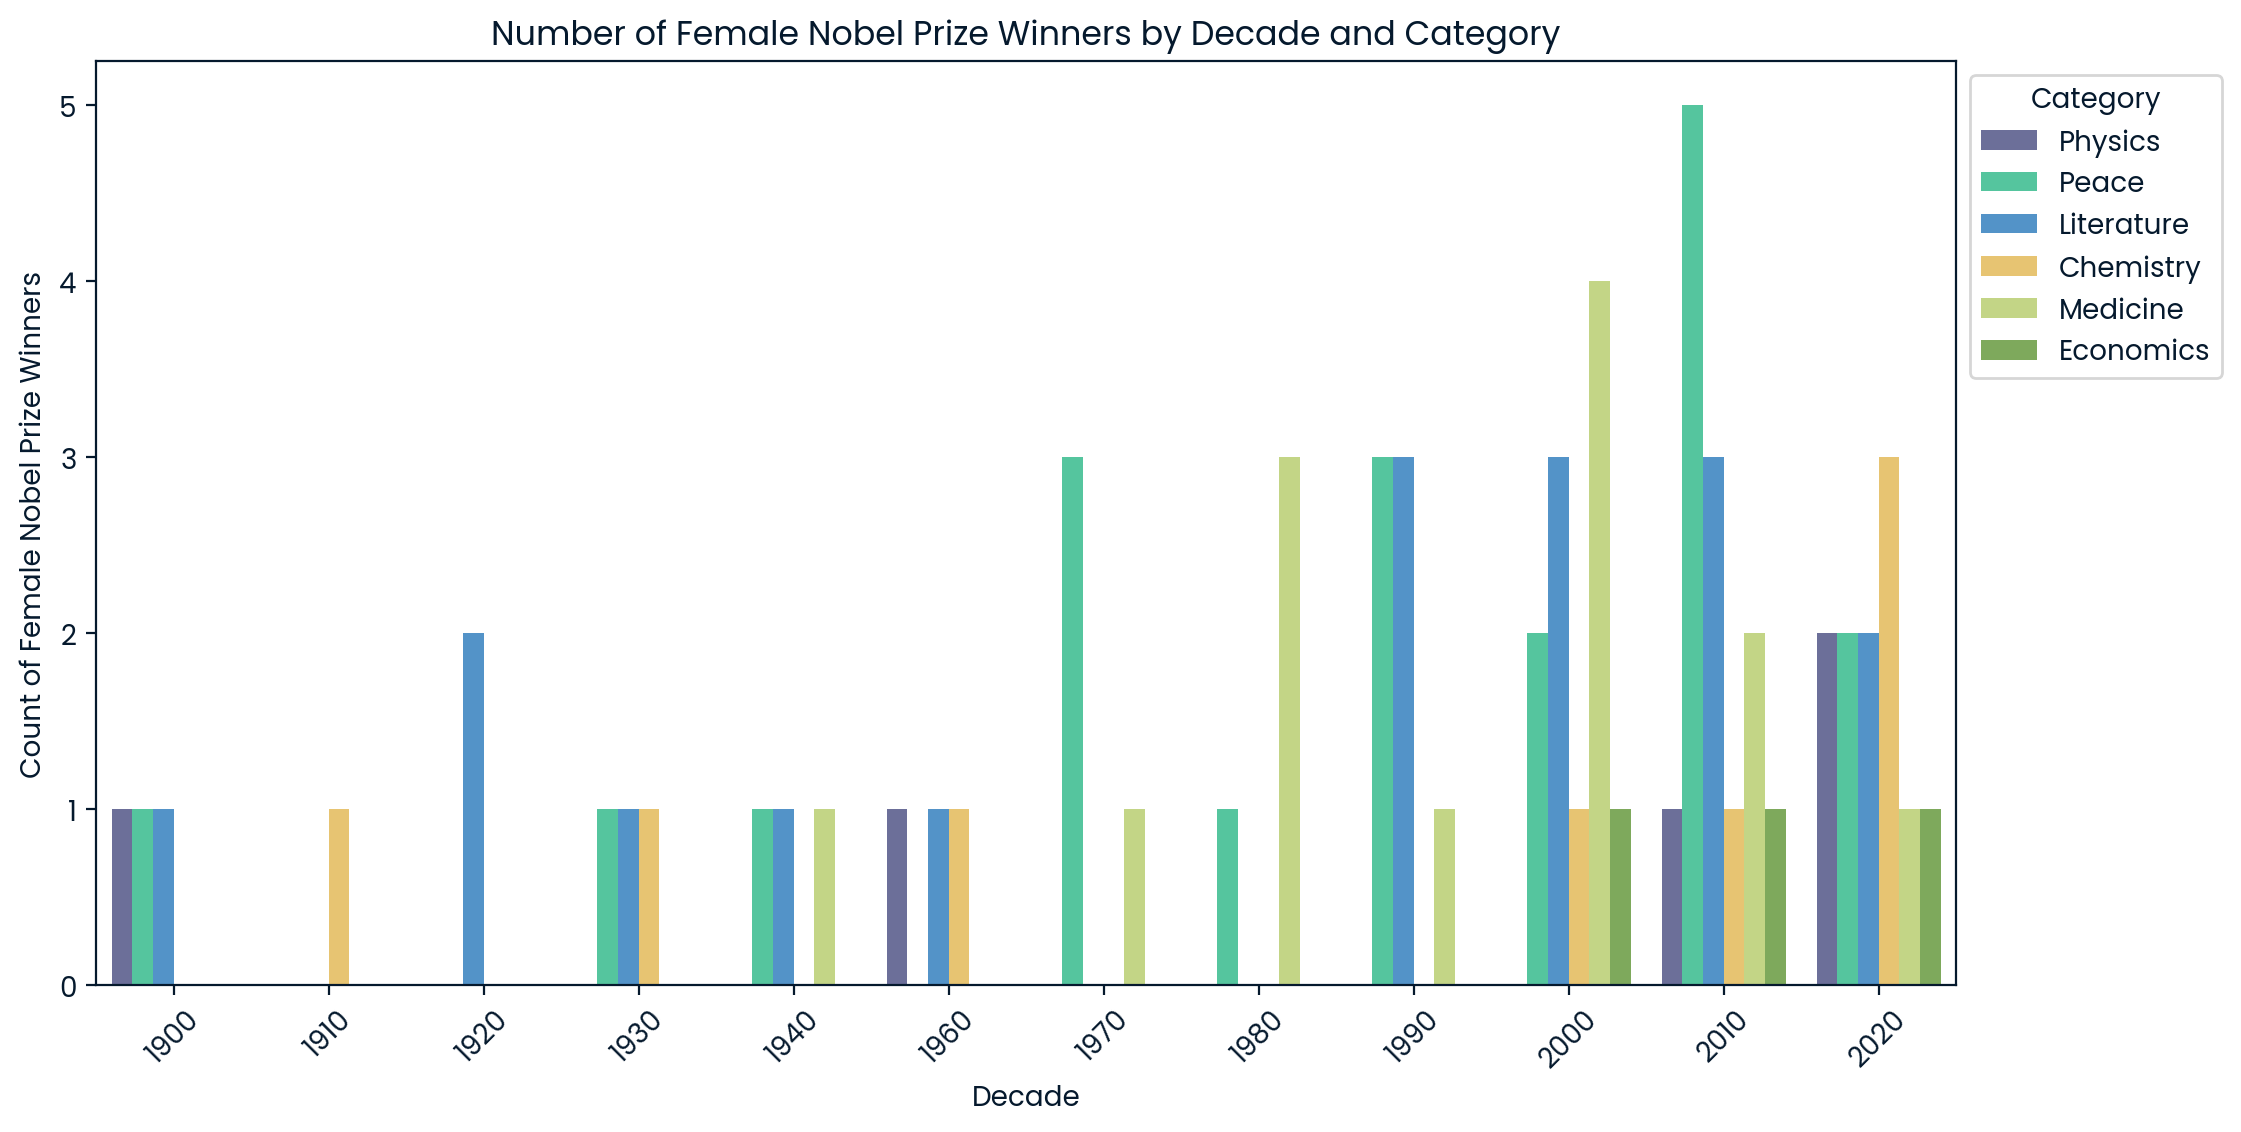

In [24]:
# Importing required libraries for the user's project
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (using the correct file path from the upload)
nobel_data = pd.read_csv('data/nobel.csv')

# Data cleaning: Handling missing values (if any) and making columns ready for analysis
nobel_data['sex'].fillna('Unknown', inplace=True)

# Adding a 'decade' column based on the year
nobel_data['decade'] = (nobel_data['year'] // 10) * 10

# Creating the required variables

# 1. Most common gender and birth country
top_gender = nobel_data['sex'].mode()[0]
top_country = nobel_data['birth_country'].mode()[0]

# 2. Decade with the highest ratio of US-born Nobel Prize winners to total winners
us_winners = nobel_data[nobel_data['birth_country'] == 'United States of America']
total_by_decade = nobel_data.groupby('decade').size()
us_by_decade = us_winners.groupby('decade').size()
ratio_by_decade = (us_by_decade / total_by_decade).fillna(0)
max_decade_usa = ratio_by_decade.idxmax()

# 3. Decade and category combination with the highest proportion of female laureates
female_winners = nobel_data[nobel_data['sex'] == 'Female']
female_by_decade_category = female_winners.groupby(['decade', 'category']).size()
total_by_decade_category = nobel_data.groupby(['decade', 'category']).size()
proportion_female_by_decade_category = (female_by_decade_category / total_by_decade_category).fillna(0)
max_female_combination = proportion_female_by_decade_category.idxmax()
max_female_dict = {max_female_combination[0]: max_female_combination[1]}

# 4. First woman to receive a Nobel Prize and the category
first_female_winner = female_winners.sort_values('year').iloc[0]
first_woman_name = first_female_winner['full_name']
first_woman_category = first_female_winner['category']

# 5. Individuals or organizations that have won more than one Nobel Prize
repeat_winners = nobel_data['full_name'].value_counts()
repeat_list = repeat_winners[repeat_winners > 1].index.tolist()

# Printing the values to confirm
print(f"Top Gender: {top_gender}")
print(f"Top Country: {top_country}")
print(f"Decade with highest US-born Nobel Prize winner ratio: {max_decade_usa}")
print(f"Decade and Category with highest proportion of female laureates: {max_female_dict}")
print(f"First woman to win a Nobel Prize: {first_woman_name} in {first_woman_category}")
print(f"Individuals/Organizations who won more than one Nobel Prize: {repeat_list}")

# Continue with visualizations

# 1. Gender distribution of Nobel Prize winners
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=nobel_data)
plt.title('Gender Distribution of Nobel Prize Winners')
plt.xlabel('Gender')
plt.ylabel('Count of Nobel Prize Winners')
plt.show()

# 2. Birth country distribution (Top 10 countries)
plt.figure(figsize=(10, 6))
top_countries = nobel_data['birth_country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Birth Countries of Nobel Prize Winners')
plt.xlabel('Number of Winners')
plt.ylabel('Country')
plt.show()

# 3. Time trend of Nobel Prize winners over the decades
plt.figure(figsize=(10, 6))
sns.countplot(x='decade', data=nobel_data)
plt.title('Number of Nobel Prize Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of Nobel Prize Winners')
plt.xticks(rotation=45)
plt.show()

# 4. Female laureates by decade and category
female_winners = nobel_data[nobel_data['sex'] == 'Female']
plt.figure(figsize=(12, 6))
sns.countplot(x='decade', hue='category', data=female_winners)
plt.title('Number of Female Nobel Prize Winners by Decade and Category')
plt.xlabel('Decade')
plt.ylabel('Count of Female Nobel Prize Winners')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()